In [57]:
#import pandas
import pandas as pd
#read in data from "births.csv" and "score.csv" as dataframes
birthsdf=pd.read_csv("files/births.csv", sep=",")
scoredf=pd.read_csv("files/score.csv", sep=",")

In [58]:
#examine the births dataset
birthsdf.head(10)
print(birthsdf.dtypes)
birthsdf.describe()

id           int64
bweight      int64
lowbw        int64
gestwks    float64
preterm    float64
matage       int64
hyp          int64
sex          int64
dtype: object


,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex
count,500.000000,500.000000,500.000000,490.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,3136.884000,0.120000,38.721857,0.128571,34.028000,0.144000,1.472000
std,144.481833,637.451485,0.325287,2.314167,0.335067,3.897897,0.351441,0.499715
min,1.000000,628.000000,0.000000,24.690001,0.000000,23.000000,0.000000,1.000000
25%,125.750000,2862.000000,0.000000,37.939999,0.000000,31.000000,0.000000,1.000000
50%,250.500000,3188.500000,0.000000,39.125000,0.000000,34.000000,0.000000,1.000000
75%,375.250000,3551.250000,0.000000,40.090000,0.000000,37.000000,0.000000,2.000000
max,500.000000,4553.000000,1.000000,43.160000,1.000000,43.000000,1.000000,2.000000


In [59]:
#Transform categorical variables in the right format
# sex 2, 1, etc
#add label?
birthsdf["lowbw"]=birthsdf["lowbw"].astype("category")
birthsdf["preterm"]=birthsdf["preterm"].astype("category")
birthsdf["hyp"]=birthsdf["hyp"].astype("category")
birthsdf["sex"]=birthsdf["sex"].astype("category")

birthsdf.head(10)
birthsdf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       500 non-null    int64   
 1   bweight  500 non-null    int64   
 2   lowbw    500 non-null    category
 3   gestwks  490 non-null    float64 
 4   preterm  490 non-null    category
 5   matage   500 non-null    int64   
 6   hyp      500 non-null    category
 7   sex      500 non-null    category
dtypes: category(4), float64(1), int64(3)
memory usage: 18.2 KB


In [60]:
#new dataframe with any rows with missing data excluded
birthsdf_clean=birthsdf.dropna()
scoredf_clean=scoredf.dropna()



In [61]:
#merge two dataframes, keeping matching and unmatching rows
merged_df=pd.merge(birthsdf_clean, scoredf_clean, on="id", how="outer")
#this creates a new datafarme merging by id number. 

merged_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       490 non-null    int64   
 1   bweight  490 non-null    int64   
 2   lowbw    490 non-null    category
 3   gestwks  490 non-null    float64 
 4   preterm  490 non-null    category
 5   matage   490 non-null    int64   
 6   hyp      490 non-null    category
 7   sex      490 non-null    category
 8   score    425 non-null    float64 
dtypes: category(4), float64(2), int64(3)
memory usage: 21.7 KB


In [62]:

columns_to_check=["bweight","lowbw","gestwks","preterm","matage","hyp","sex","score"]
missing_count = merged_df[columns_to_check].isna().sum()
print(missing_count)

#There are rows without scores (65), but there are no rows that have score values but do not have the other info. I.e. all the ids in the score dataset are in the births dataset.
#Comment on number and stats

bweight     0
lowbw       0
gestwks     0
preterm     0
matage      0
hyp         0
sex         0
score      65
dtype: int64


In [63]:
#Reorder the merged dataset by variable score
sorted_merged_df=merged_df.sort_values(by="score", ascending=True).copy()



In [64]:
import numpy as np
#Drops rows with missing values
# do not need to drop 
#cleaned_merged_df=merged_df.dropna().copy()


correlation_coef_bweight_vs_gestwks=np.corrcoef(cleaned_merged_df["bweight"], cleaned_merged_df["gestwks"])[0,1]
correlation_coef_matage_vs_bweight=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["bweight"])[0,1]
correlation_coef_bweight_vs_score=np.corrcoef(cleaned_merged_df["bweight"], cleaned_merged_df["score"])[0,1]
correlation_coef_score_vs_gestwks=np.corrcoef(cleaned_merged_df["score"], cleaned_merged_df["gestwks"])[0,1]
correlation_coef_matage_vs_score=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["score"])[0,1]
correlation_coef_matage_vs_gestwks=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["gestwks"])[0,1]
print(f"The correlation coefficient between birthweight and gestational weeks is {round(correlation_coef_bweight_vs_gestwks,8)}.")
print(f"The correlation coefficient between maternal age and birthweight is {round(correlation_coef_matage_vs_bweight,8)}.")
print(f"The correlation coefficient between birthweight and score is {round(correlation_coef_bweight_vs_score,8)}.")
print(f"The correlation coefficient between gestational weeks and score is {round(correlation_coef_score_vs_gestwks,8)}.")
print(f"The correlation coefficient between maternal age and score is {round(correlation_coef_matage_vs_score,8)}.")
print(f"The correlation coefficient between maternal age and gestational weeks is {round(correlation_coef_matage_vs_gestwks,8)}.")


#correlation_coef_bweight_vs_gestwks=np.corrcoef(merged_df["bweight"], merged_df["gestwks"])[0,1] 
#DO THIS INSTEAD
#print(correlation_coef_bweight_vs_gestwks)
#maybe only drop corrcoef with score?-.corr() function in numpy will need to drop Na first
#give correlation coefficient matrix instead
correlation_coef_bweight_vs_score=merged_df["bweight"].corr(merged_df["score"])
correlation_coef_bweight_vs_matage=merged_df["bweight"].corr(merged_df["matage"])
print(correlation_coef_bweight_vs_score)
print(correlation_coef_bweight_vs_matage)


The correlation coefficient between birthweight and gestational weeks is 0.69950776.
The correlation coefficient between maternal age and birthweight is -0.00965464.
The correlation coefficient between birthweight and score is 0.33650623.
The correlation coefficient between gestational weeks and score is 0.40599579.
The correlation coefficient between maternal age and score is 0.00410953.
The correlation coefficient between maternal age and gestational weeks is 0.01547187.
0.33650622629372634
0.017933218240616833


In [65]:
#Examine the two way distribution of the categorical variables in tabular form.

sex_hyp_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["hyp"])
print('Sex and Hypertension distribution:\n', sex_hyp_group, '\n')
sex_preterm_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["preterm"])
print('Sex and Preterm distribution:\n', sex_preterm_group, '\n')
preterm_hyp_group=pd.crosstab(cleaned_merged_df["preterm"], cleaned_merged_df["hyp"])
print('Preterm and Hypertension distribution:\n', preterm_hyp_group, '\n')
lowbw_sex_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["lowbw"])
print('Low birthweight and Sex distribution:\n', lowbw_sex_group, '\n')
lowbw_hyp_group=pd.crosstab(cleaned_merged_df["lowbw"], cleaned_merged_df["hyp"])
print('Lowbirthweight and Hypertension distribution:\n', lowbw_hyp_group, '\n')
lowbw_preterm_group=pd.crosstab(cleaned_merged_df["lowbw"], cleaned_merged_df["preterm"])
print('Low birghweight and Preterm distribution:\n', lowbw_preterm_group, '\n')

Sex and Hypertension distribution:
 hyp    0   1
sex         
1    191  36
2    178  20 

Sex and Preterm distribution:
 preterm  0.0  1.0
sex              
1        202   25
2        174   24 

Preterm and Hypertension distribution:
 hyp        0   1
preterm         
0.0      332  44
1.0       37  12 

Low birthweight and Sex distribution:
 lowbw    0   1
sex           
1      204  23
2      171  27 

Lowbirthweight and Hypertension distribution:
 hyp      0   1
lowbw         
0      333  42
1       36  14 

Low birghweight and Preterm distribution:
 preterm  0.0  1.0
lowbw            
0        356   19
1         20   30 



In [66]:
#create a new variable highscore that identifies a score higher than 150
condition=[cleaned_merged_df["score"]>150, cleaned_merged_df["score"]<=150]
choices=["1", "0"]
cleaned_merged_df["highscore"]= np.select(condition, choices, default="0")
#cleaned_merged_df["highscore"]=cleaned_merged_df[cleaned_merged_df["score"]150]

print(cleaned_merged_df)

      id  bweight lowbw    gestwks preterm  matage hyp sex       score  \
0      1     2974     0  38.520000     0.0      34   0   2  182.279785   
1      3     2620     0  38.150002     0.0      35   0   2  174.372831   
2      4     3751     0  39.799999     0.0      31   0   1  188.701484   
4      6     3673     0  40.970001     0.0      33   0   2  180.351763   
5      7     3628     0  42.139999     0.0      29   0   2  176.544494   
..   ...      ...   ...        ...     ...     ...  ..  ..         ...   
485  496     2852     0  38.450001     0.0      28   0   2  161.526635   
486  497     3187     0  38.029999     0.0      38   1   1  140.624805   
487  498     3054     0  38.500000     0.0      26   0   2  170.273407   
488  499     3178     0  39.919998     0.0      31   0   2  172.190403   
489  500     2918     0  37.970001     0.0      31   0   1  164.519514   

    highscore  
0           1  
1           1  
2           1  
4           1  
5           1  
..        ...  

In [67]:
#create an aggregated version of the dataset that reports average birthweight by high score and sex
#? use .agg
aggregated_df=cleaned_merged_df.groupby(["highscore","sex"])["bweight"].mean()
aggregated_df2=cleaned_merged_df.groupby(["highscore","sex"])["bweight"].agg(average_bweight="mean").reset_index()
print(aggregated_df)
print(aggregated_df2)

highscore  sex
0          1      2859.514286
           2      2472.500000
1          1      3308.812500
           2      3090.427778
Name: bweight, dtype: float64
  highscore sex  average_bweight
0         0   1      2859.514286
1         0   2      2472.500000
2         1   1      3308.812500
3         1   2      3090.427778


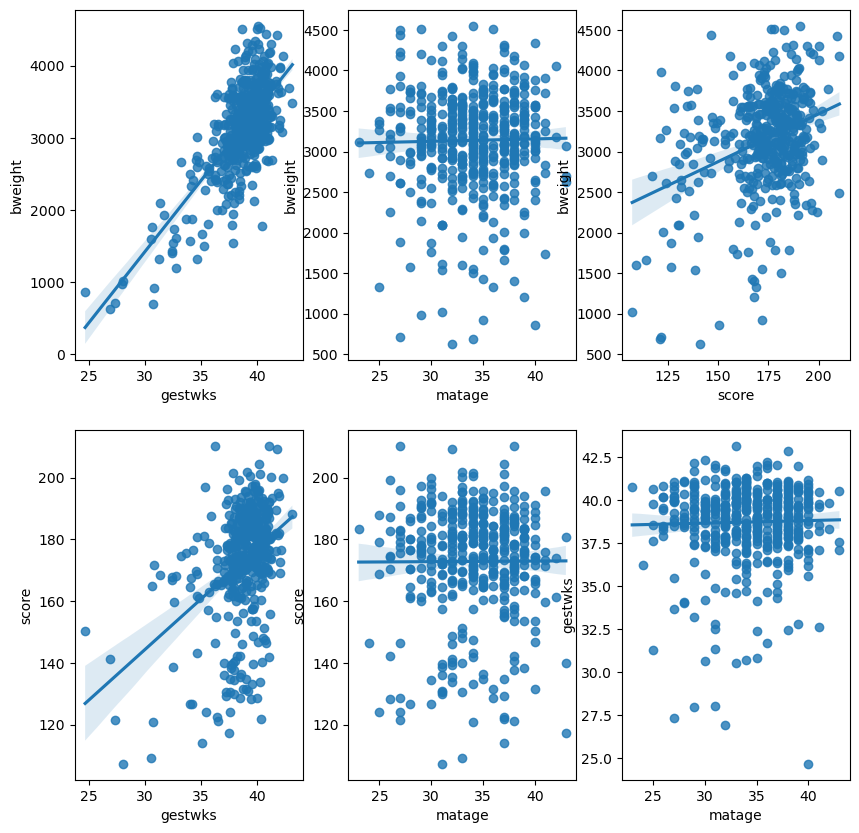

In [68]:
#using seaborn and regression plots to examine relationship between continuous variables
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs=plt.subplots(2, 3, figsize=(10,10))
sns.regplot(x=merged_df["gestwks"], y=merged_df["bweight"], ax=axs[0,0])
sns.regplot(x=merged_df["matage"], y=merged_df["bweight"], ax=axs[0,1])
sns.regplot(x=merged_df["score"], y=merged_df["bweight"], ax=axs[0,2])
sns.regplot(x=merged_df["gestwks"], y=merged_df["score"], ax=axs[1,0])
sns.regplot(x=merged_df["matage"], y=merged_df["score"], ax=axs[1,1])
sns.regplot(x=merged_df["matage"], y=merged_df["gestwks"], ax=axs[1,2])
plt.show()

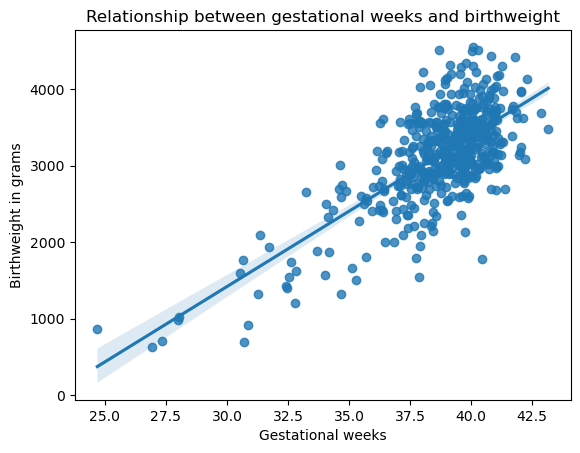

In [69]:
sns.regplot(x=merged_df["gestwks"], y=merged_df["bweight"])
plt.xlabel("Gestational weeks")
plt.ylabel("Birthweight in grams")
plt.title("Relationship between gestational weeks and birthweight")
plt.savefig("Bweightvsgestwks.pdf", format="pdf")
plt.show()




In [70]:
cleaned_merged_df.to_excel("cleaned_merged_dataset.xlsx", index=False)